In [1]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("github_token")
import shutil

# shutil.rmtree('/kaggle/working/Gender-Classifier')

!git clone https://{secret_value_0}@github.com/Frontman-11/Gender-Classifier.git /kaggle/working/Gender-Classifier

Cloning into '/kaggle/working/Gender-Classifier'...
remote: Enumerating objects: 214, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 214 (delta 33), reused 0 (delta 0), pack-reused 148 (from 1)
Receiving objects: 100% (214/214), 25.50 MiB | 10.01 MiB/s, done.
Resolving deltas: 100% (118/118), done.


# SUMMARY

${This\ notebook\ evaluates\ the\ model\ on\ all\ three\ datasets\ for\ easy\ comparison.\ It\ also\ adds\ some\ visualization.}$

## Import Packages

In [2]:
import sys
sys.path.append('/kaggle/working/Gender-Classifier/')
from image_utils import read_plot_image, plot_wrong_pred
import preprocess
from evaluation import Evaluation
#################
import tensorflow as tf
import glob
import importlib
# import evaluation
# importlib.reload(evaluation)

2024-08-18 15:14:35.857412: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 15:14:35.857518: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 15:14:35.992962: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Seeding 

In [3]:
tf.random.set_seed(42)

## Datasets

### ${Gathering\ datasets\ filepaths}$

In [4]:
train_male_pattern = '/kaggle/input/male-tfrecord-dataset/train_male.tfrecord-*-of-*'
train_female_pattern = '/kaggle/input/female-tfrecord-dataset/train_female.tfrecord-*-of-*'

valid_male_pattern = '/kaggle/input/tfrecord-writing/valid_male.tfrecord-*-of-*'
valid_female_pattern = '/kaggle/input/tfrecord-writing/valid_female.tfrecord-*-of-*'

test_female_pattern = '/kaggle/input/tfrecord-writing/test_female.tfrecord-*-of-*'
test_male_pattern = '/kaggle/input/tfrecord-writing/test_male.tfrecord-*-of-*'



train_male_filepaths = glob.glob(train_male_pattern)
train_female_filepaths = glob.glob(train_female_pattern)

valid_male_filepaths = glob.glob(valid_male_pattern)
valid_female_filepaths = glob.glob(valid_female_pattern)

test_male_filepaths = glob.glob(test_male_pattern)
test_female_filepaths = glob.glob(test_female_pattern)


train_filepaths = train_male_filepaths + train_female_filepaths
valiid_filepaths = valid_male_filepaths + valid_female_filepaths
test_filepaths = test_male_filepaths + test_female_filepaths 


train_file_dataset = tf.data.Dataset.from_tensor_slices(train_filepaths)

valid_file_dataset = tf.data.Dataset.from_tensor_slices(valiid_filepaths)

test_male_file_dataset = tf.data.Dataset.from_tensor_slices(test_male_filepaths)
test_female_file_dataset = tf.data.Dataset.from_tensor_slices(test_female_filepaths)
test_file_dataset = tf.data.Dataset.from_tensor_slices(test_filepaths)

### ${Getting\ dataset}$

In [5]:
train_set = preprocess.gender_dataset(
    filepaths=train_file_dataset,
    repeat=False,
    normalise=True,
    augment_image=None,
    shuffle_buffer_size=None,
    cache=None,
    batch_size=128,
    image_shape=(218, 178, 3),
    n_reads=tf.data.AUTOTUNE,
    prefetch=tf.data.AUTOTUNE,
) 

valid_set = preprocess.gender_dataset(
    filepaths=valid_file_dataset,
    batch_size=128,
    image_shape=(218, 178, 3),
    n_reads=tf.data.AUTOTUNE,
    prefetch=tf.data.AUTOTUNE,
)

test_male_set = preprocess.gender_dataset(
    test_male_file_dataset,
    batch_size=128,
    n_reads=tf.data.AUTOTUNE
)

test_female_set = preprocess.gender_dataset(
    test_female_file_dataset,
    batch_size=128,
    n_reads=tf.data.AUTOTUNE
)

test_set = preprocess.gender_dataset(
    test_file_dataset,
    batch_size=128,
    n_reads=tf.data.AUTOTUNE
)

## Model Loading

In [6]:
model_filepath = '/kaggle/input/gender-classifier/tensorflow2/default/2/model_1.keras'

model = tf.keras.models.load_model(model_filepath)

## Evaluation

In [7]:
train_evaluation = Evaluation(model, train_set)
valid_evaluation = Evaluation(model, valid_set)
test_evaluation = Evaluation(model, test_set)

### ${`classification\_report`\ for\ `train\_set`}$ 

In [8]:
train_evaluation.generate_classification_report(digits=4)

              precision    recall  f1-score   support

           0     0.9943    0.9970    0.9957     92845
           1     0.9958    0.9921    0.9940     67155

    accuracy                         0.9950    160000
   macro avg     0.9951    0.9946    0.9948    160000
weighted avg     0.9950    0.9950    0.9949    160000



### ${`classification\_report`\ for\ `valid\_set`}$ 

In [9]:
valid_evaluation.generate_classification_report(digits=4)

              precision    recall  f1-score   support

           0     0.9857    0.9892    0.9874     13778
           1     0.9830    0.9776    0.9803      8820

    accuracy                         0.9846     22598
   macro avg     0.9843    0.9834    0.9839     22598
weighted avg     0.9846    0.9846    0.9846     22598



### ${`classification\_report`\ for\ `test\_set`}$ 

In [10]:
test_evaluation.generate_classification_report(digits=4)

              precision    recall  f1-score   support

           0     0.9880    0.9888    0.9884     11542
           1     0.9847    0.9836    0.9841      8459

    accuracy                         0.9866     20001
   macro avg     0.9863    0.9862    0.9863     20001
weighted avg     0.9866    0.9866    0.9866     20001



## Visualization

###  ${`confusion\_matrix`\ for\ 'train\_set`}$

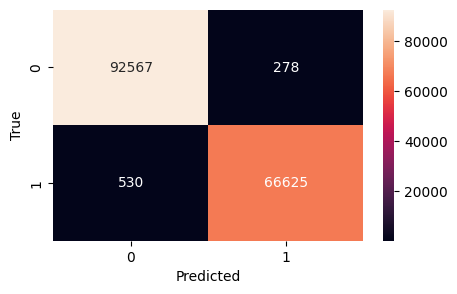

In [11]:
train_evaluation.plot_confusion_matrix(figsize=(5, 3))

###  ${`confusion\_matrix`\ for\ 'valid\_set`}$

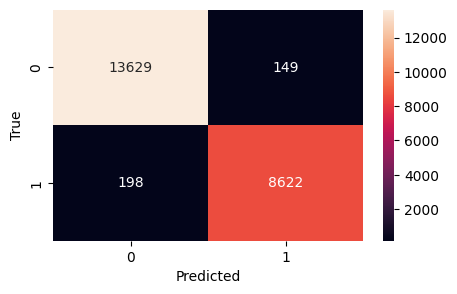

In [12]:
valid_evaluation.plot_confusion_matrix(figsize=(5, 3))

###  ${`confusion\_matrix`\ for\ 'test\_set`}$

*Note that the folloowing plots returns the true label of the dataset. This means when the label is MALE for instance then it means the model predicted it as FEMALE.*

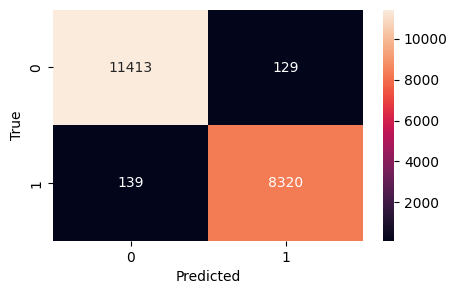

In [13]:
test_evaluation.plot_confusion_matrix(figsize=(5, 3))

###  ${Wrong\ prediction\ grid\ for\ 'train\_set`}$

In [14]:
y_true, y_pred = train_evaluation.return_pred_and_label()

plot_wrong_pred(
    dataset=train_set,
    y_true=y_true,
    preds=y_pred,
    subplot_row_col=(29, 29),
    figsize=(40, 40),
    fname='/kaggle/working/train_wrongs.png',
    show=False,
    take=-1
)

###  ${Wrong\ prediction\ grid\ for\ 'valid\_set`}$

In [15]:
y_true, y_pred = valid_evaluation.return_pred_and_label()

plot_wrong_pred(
    dataset=valid_set,
    y_true=y_true,
    preds=y_pred,
    subplot_row_col=(19, 19),
    figsize=(30, 30),
    fname='/kaggle/working/valid_wrongs.png',
    show=False,
    take=-1
)

###  ${Wrong\ prediction\ grid\ for\ 'test\_set`}$

In [16]:
y_true, y_pred = test_evaluation.return_pred_and_label()

plot_wrong_pred(
    dataset=test_set,
    y_true=y_true,
    preds=y_pred,
    subplot_row_col=(17, 17),
    figsize=(25, 25),
    fname='/kaggle/working/test_wrongs.png',
    show=False,
    take=-1
)